# Twitter Mining 

## Einstieg: Was ist Twitter 

Twitter ist ein Social Network, wo angemeldete Nutzer Kurznachrichten (Tweets) verbreiten können. Bis vor kurzem war die maximale Länge der Tweets 140 Zeichen, neuerdings können die Tweets de doppelte Zeichenlänge betragen. Diese Tweets können favorisiert, geteilt (retweet) oder auch mit einem eigenen Tweet kommentiert werden.
Tweets können auf andere User verweisen (@username), Bilder, Links und Standorte können geteilt werden, und Hashtags (#) können genutzt werden. Nach diesen Hashtags kann auf der gesamten Website gesucht werden, wodurch regen Diskussionen eine Plattform geboten wird. 

## API

Eine Programmierschnittstelle (kurz: API) ist ein Programmteil, der von einem Softwaresystem anderen Programmen zur Anbindung an das System zur Verfügung gestellt wird. Sie dient dazu, Informationen zwischen einer Anwendung und einzelnen Programmteilen standardisiert auszutauschen. Die Übergabe von Daten und Befehlen erfolgt strukturiert nach einer zuvor definierten Syntax. Die Kommunikation von einzelnen Programmmodulen ist lediglich über die genau spezifizierte Schnittstelle möglich. Die Twitter-API erlaubt die Integration von Twitter in andere Anwendungen und Websites.

### Python-Package: Twitter

Auch in Python gibt es ein Package, dass die Twitter-API verpackt und die öffentliche API-Semantik fast 1-zu-1 imitiert. Dieses Package heißt *Twitter*.
Dieses kann, wie andere Packages, mithilfe von pip installiert werden.
Dazu muss zunächst die cmd.exe geöffnet werden und mittels cmd-Befehlen (cd) auf das Verzeichnis ...\Anaconda3\Scripts gewechselt werden, wo dann `pip install twitter` eingegeben werden muss. Nach Drücken der Enter-Taste wird das package installiert und man kann anfangen Twitter Mining mit Python zu betreiben.

Um die Twitter-Bibliothek in unserem JupyterNotebook nutzen zu können müssen wir sie zunächst importieren.

In [1]:
import twitter

Als nächstes können wir uns die Dokumentation unserer Bibliothek anschauen.

In [27]:
twitter?

## Application

Bevor man irgendwelche API-Anfragen an Twitter stellen kann, muss man zunächst einen Twitter-Account erstellen. Dieser wird benötigt, um eine Application auf https://apps.twitter.com/ zu erstellen. Eine Application zu erstellen ist der übliche Weg eines Entwicklers, um Zugriff auf die API zu erhalten. Alles was wir brauchen ist ein Lese-und-Schreib-Zugriff.

### Autentifizierung

Für die Autentifizierung der eigenen Application gibt es ein standardisiertes Protokoll **OAuth** (kurz für *Open Authorization*), dass es Benutzern erlaubt, Anwendungen von Drittanbietern zu autorisieren, um auf ihre Kontodaten zuzugreifen, ohne dass sensible Informationen, wie Passwörter, ausgetauscht werden müssen.
Wir benötigen deshalb  den `consumer key`, das `consumer secret`, den `access token`, und das `access token secret` unserer neu erstellten Twitter-Aplication.

![Consumer key und consumer secret](https://i.imgur.com/qcTliap.jpg "Consumer key und consumer secret")
![Access token und access token secret](https://i.imgur.com/I5tMx9d.jpg "Access token und access token secret")

Nun fangen wir an, und starten eine autentifizierte Verbindung zur Twitter-API, indem wir zunächst unsere Variablen füllen. 


In [3]:
CONSUMER_KEY = 'v6hhWSLggZvhqFZr6fFtbO7t1'
CONSUMER_SECRET = 'pNLQCcbUDIsPXfw7TWzlSCJQ1kcswk4SW1lZOWL8Yiqe6jr8qU'
OAUTH_TOKEN = '168648836-atEdUT3jeyWtCq1xQL2JhsrQQTCUEcmfxEamdsZ4' 
OAUTH_TOKEN_SECRET = 'ASJ31Q9vW1eKpZxjlyz364pqBtoFQItimexlvF5V7wF22'

Dabei legen wir ein Objekt `auth` an mit unseren OAuth-Referenzen, dass unsere OAuth-Authentifizierung darstellt und das wir an unsere Klasse Twitter weitergeben, um Anfragen an Twitters API zu stellen.

In [4]:
auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

## Twitter erforschen


### Trends untersuchen

In Twitter werden die aktuellen Trends in einer Region angezeigt. Wird über ein bestimmtes Thema, wie beispielsweise ein Bundesligaspiel, viel getwittert, wird es in die Trends aufgenommen und auf der Timeline am Rand aufgelistet. Diese Trends unterschieden sich je nach dem, welchen Ort man ausgewählt hat. 

Um die Trends von verschiedenen Standorten zu betrachten, benutzen wir [Yahoo! GeoPlanet’s] Where On Earth (WOE) ID System.
Die WOEID für die ganze Welt ist 1, Deutschland hat die ID 23424829.

[Yahoo! GeoPlanet’s]: http://www.woeidlookup.com/

In [5]:
WW_WOE_ID = 1
D_WOE_ID = 23424829

ww_trends = twitter_api.trends.place(_id=WW_WOE_ID)
d_trends = twitter_api.trends.place(_id=D_WOE_ID)

print(ww_trends)
print ()
print(d_trends)

[{'trends': [{'name': '#CyberMonday', 'url': 'http://twitter.com/search?q=%23CyberMonday', 'promoted_content': None, 'query': '%23CyberMonday', 'tweet_volume': 107821}, {'name': '#FelizLunes', 'url': 'http://twitter.com/search?q=%23FelizLunes', 'promoted_content': None, 'query': '%23FelizLunes', 'tweet_volume': 30295}, {'name': 'Meghan Markle', 'url': 'http://twitter.com/search?q=%22Meghan+Markle%22', 'promoted_content': None, 'query': '%22Meghan+Markle%22', 'tweet_volume': 143440}, {'name': '#MondayMotivation', 'url': 'http://twitter.com/search?q=%23MondayMotivation', 'promoted_content': None, 'query': '%23MondayMotivation', 'tweet_volume': 69755}, {'name': '#27Nov', 'url': 'http://twitter.com/search?q=%2327Nov', 'promoted_content': None, 'query': '%2327Nov', 'tweet_volume': 14262}, {'name': '#تعرف_سيلفا', 'url': 'http://twitter.com/search?q=%23%D8%AA%D8%B9%D8%B1%D9%81_%D8%B3%D9%8A%D9%84%D9%81%D8%A7', 'promoted_content': None, 'query': '%23%D8%AA%D8%B9%D8%B1%D9%81_%D8%B3%D9%8A%D9%84%D

Wie wir sehen können, ist die Ausgabe ziemlich unübersichtlich. Um das ganze schöner darzustellen, werden wir die `json` Bibliothek benutzen.

Json ist ein weitverbreitetes Datenaustauschformat. Es ermöglicht es beliebige Karten, Listen, Zahlen, sowie auch Strings und Kombinationen dieser zu speichern. Bei JSON handelt es sich um ein Textformat, das komplett unabhängig von Programmiersprachen ist, aber vielen Konventionen folgt, die Programmieren (C, C++, C#, Java, JavaScript und auch Python) bekannt ist. Diese Eigenschaften machen JSON zum idealen Format für Datenaustausch.

Um unser Ergebnis schön darzustellen genügt es, folgendes zu tun:

In [6]:
import json

print (json.dumps(ww_trends, indent=1))
print()
print(json.dumps(d_trends, indent=1))

[
 {
  "trends": [
   {
    "name": "#CyberMonday",
    "url": "http://twitter.com/search?q=%23CyberMonday",
    "promoted_content": null,
    "query": "%23CyberMonday",
    "tweet_volume": 107821
   },
   {
    "name": "#FelizLunes",
    "url": "http://twitter.com/search?q=%23FelizLunes",
    "promoted_content": null,
    "query": "%23FelizLunes",
    "tweet_volume": 30295
   },
   {
    "name": "Meghan Markle",
    "url": "http://twitter.com/search?q=%22Meghan+Markle%22",
    "promoted_content": null,
    "query": "%22Meghan+Markle%22",
    "tweet_volume": 143440
   },
   {
    "name": "#MondayMotivation",
    "url": "http://twitter.com/search?q=%23MondayMotivation",
    "promoted_content": null,
    "query": "%23MondayMotivation",
    "tweet_volume": 69755
   },
   {
    "name": "#27Nov",
    "url": "http://twitter.com/search?q=%2327Nov",
    "promoted_content": null,
    "query": "%2327Nov",
    "tweet_volume": 14262
   },
   {
    "name": "#\u062a\u0639\u0631\u0641_\u0633\u064a\u0

Interessant ist es jetzt, rauszufinden, wie üblich ein gewisser Trend in den einzelnen Regionen ist. Dazu benutzen wir Pythons `set` Datenstruktur, mit deren Hilfe wir zum einen herausfinden können, welche gemeinsamen Trends in den jeweiligen Regionen vorkommen, aber auch welche Trends nur in einer der Regionen vorkommen. 

In [7]:
ww_trend_set = set([trend['name'] for trend in ww_trends[0]['trends']])

d_trend_set = set([trend['name'] for trend in d_trends[0]['trends']])

common_trends = ww_trend_set.intersection(d_trend_set)
difference_trends = ww_trend_set.symmetric_difference(d_trend_set)

print("Gemeinsame Trends: ", common_trends)
print()
print("Unterschiedliche Trending Topics: " ,difference_trends)

Gemeinsame Trends:  {'#Schlecker', 'Jimi Hendrix', '#MondayMotivation'}

Unterschiedliche Trending Topics:  {'#Totensonntag', '#some17', '#Götze', '#قضيه_دخول_المجلس', '#JogoDePanelas', '#TGSHulingHuli', '#EuSouBoboMas', '#schwiegertochtergesucht', '#TheBestFeelingIn5Words', '#LLSPowerUp', '#CyberMonday', '#nurderHSV', 'Peing', '#VRC17', '#Blitzer', 'Ungleichheit', '#vouli', '#SoldChaiNotNation', '#BVBS04', '#qanda', 'Cyber Monday', '#FarkındamısınBilmiyorumAma', '#كيف_تدخر_من_راتبك', '#Watzke', '#Pakistan', '#Montagslaecheln', 'Selahattin Demirtaş', '#QuemSabeUmDiaEu', '#しゃべくり007', '#BoycottNetflix', 'Start in die Woche', '#Montella', '#Bonn', '#InfinityWar', '#LancashireDay', '#AnneWill', 'Ismail Yozgat', '#sps_live', '#Stöger', '#Sicherheit', '#jhv2017', '#好きな映画を雑に説明する', '#IwillVote4NawazSharif', '#SignsYoureMarriedToASpy', '#Higuain', '#AdoteUmaCriança', '#SegundaDetremuraSDV', '#SPPRAudioOnDec6', '#Hadiya', '#Neureuther', '#Breitscheidplatz', '#Fabio', '#나를_오프에서_본_후기', 'Prinz Harr

### Suchen nach Tweets

Um Analysen mithilfe von Twitter zu betreiben, ist es selbsterklärend, dass wir nach Tweets zu einem bestimmten Thema suchen. Dies können politische, sportliche, so wie prominente Themen sein oder man findet seine Tweets unter einem Hashtag, welcher im Moment trendet. 


Zum Zeitpunkt, als ich an dieser Ausarbeitung gearbeitet habe, hat beispielsweise in den Vereingten Staaten der Hashtag *#TookMeTheWholeYearTo* getrendet. Deshalb nehm ich diesen als Beispiel für meinen nächsten Abschnitt.

In [8]:
q = '#TookMeTheWholeYearTo'

count = 100

# siehe https://developer.twitter.com/en/docs/tweets/search/api-reference/get-search-tweets

search_results = twitter_api.search.tweets(q=q, count=count)
statuses = search_results['statuses']

# Wir werden 5 Mal die Ergebnisse durchlaufen.

for _ in range(5):
    print ('Length of statuses', len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError: # Keine Ergebnisse mehr, wenn next_results nicht mehr existiert
         break
            
    # Erstelle ein dictionary von next_results, welches die folgende Form hat:
    # ?max_id=313519052523986943&q=NCAA&include_entities=1
    kwargs = dict([ kv.split('=') for kv in next_results[1:].split("&") ])
        
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

Length of statuses 67


In [9]:
# Anzeigen eines Such-Ergebnis-Beispiels
print(json.dumps(statuses[0], indent = 1))

{
 "created_at": "Mon Nov 27 04:12:50 +0000 2017",
 "id": 934998422704349184,
 "id_str": "934998422704349184",
 "text": "RT @PamJenk042071: #TookMeTheWholeYearTo decide I need another year to get my shit together",
 "truncated": false,
 "entities": {
  "hashtags": [
   {
    "text": "TookMeTheWholeYearTo",
    "indices": [
     19,
     40
    ]
   }
  ],
  "symbols": [],
  "user_mentions": [
   {
    "screen_name": "PamJenk042071",
    "name": "Pam~demonium",
    "id": 889433842276290560,
    "id_str": "889433842276290560",
    "indices": [
     3,
     17
    ]
   }
  ],
  "urls": []
 },
 "metadata": {
  "iso_language_code": "en",
  "result_type": "recent"
 },
 "source": "<a href=\"http://twitter.com/download/android\" rel=\"nofollow\">Twitter for Android</a>",
 "in_reply_to_status_id": null,
 "in_reply_to_status_id_str": null,
 "in_reply_to_user_id": null,
 "in_reply_to_user_id_str": null,
 "in_reply_to_screen_name": null,
 "user": {
  "id": 796812288690950144,
  "id_str": "79681228

Wie man sehen kann, sind Tweets gespickt von großen Mengen Metadaten: Bei jedem Tweet wird gespeichert, wann er erstellt wurde, von wem er erstellt wurde, welche Hashtags verwendet wurden, die einzelnen user_mentions, von welcher Twitter App der Tweet gesendet wurde (hier: Twitter for Android), ob der Tweet eine Antwort war auf einen anderen Tweet. 

Außerdem werden durch den Tweet Metadaten im Bezug auf den User gespeichert: Zum einen haben wir hier die id, den Username, die angegebene Location, eine selbst angegebene Beschreibung des Users, ob der Account des Users privat ist oder nicht, wie viele Follower der User hat und wie vielen anderen Twitter-User er folgt, wie viele Favoriten der User hat, wann der Twitter-Account erstellt wurde, wie viele Tweets der Account bisher hat und so weiter.

Es ist erstaunlich wie viel aus einem 280-Zeichen Text herausgelesen werden kann. Mithilfe der Medadaten könnte man auch sehr viele unterschiedliche Analysen aufstellen.


## Analyse der 280 Zeichen

Wir extrahieren einen einzelnen tweet von unserem Suchergebnis in einer Variable `t`. Nun können wir verschiedene Aspekte des Tweets anzeigen lassen.

In [10]:
t = statuses[0]
print(t['text']) # zeigt den Tweet an
print()
print(t['id']) # gibt uns die id des User von unserem Tweet aus
print()
print(t['entities']) # gibt uns die Entitäten eines Tweets zurück
print()
print(t['favorite_count']) #Zeigt uns die Anzahl der Favoriten an, die unser Tweet erhalten hat. In unserem Beispiel ist das 0

# siehe https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object

RT @PamJenk042071: #TookMeTheWholeYearTo decide I need another year to get my shit together

934998422704349184

{'hashtags': [{'text': 'TookMeTheWholeYearTo', 'indices': [19, 40]}], 'symbols': [], 'user_mentions': [{'screen_name': 'PamJenk042071', 'name': 'Pam~demonium', 'id': 889433842276290560, 'id_str': '889433842276290560', 'indices': [3, 17]}], 'urls': []}

0


### Extrahieren von Tweet-Entititäten

Als nächstes werden wir die Entitäten eines Tweets in einer passenden Datenstruktur darstellen, um uns die nachfolgende Analyse zu erleichtern.

In [11]:
status_texts = [ status['text'] for status in statuses ]

screen_names = [ user_mention['screen_name'] 
                for status in statuses
                    for user_mention in status['entities']['user_mentions']]

hashtags = [ hashtag['text']
               for status in statuses
                   for hashtag in status['entities']['hashtags']]

# Erechne eine Sammlung aller Wörter von allen Tweets

words = [ w
            for t in status_texts
                for w in t.split() ]

In [12]:
#Ausgabe

print(json.dumps(status_texts[0:5], indent=1))
print(json.dumps(screen_names[0:5], indent=1))
print(json.dumps(hashtags[0:5], indent=1))
print(json.dumps(words[0:5], indent=1))

[
 "RT @PamJenk042071: #TookMeTheWholeYearTo decide I need another year to get my shit together",
 "RT @radikalchikken: #TookMeTheWholeYearTo grow back my eyebrows after a horrible incident involving flatulence and a scented candle.",
 "RT @ETAMDEGGUR: #TookMeTheWholeYearTo\nTo capture this ginger boy. https://t.co/ho4WDtRDLB",
 "RT @ellelljaytoo: #TookMeTheWholeYearTo get from the bottom! Now we here, wooot! #HalfwayThere See y'all next year!\ud83d\ude43\n\n#StriveForGreatness\u2026",
 "RT @tvserieshub: #TookMeTheWholeYearTo be in November now."
]
[
 "PamJenk042071",
 "radikalchikken",
 "ETAMDEGGUR",
 "ellelljaytoo",
 "tvserieshub"
]
[
 "TookMeTheWholeYearTo",
 "TookMeTheWholeYearTo",
 "TookMeTheWholeYearTo",
 "TookMeTheWholeYearTo",
 "HalfwayThere"
]
[
 "RT",
 "@PamJenk042071:",
 "#TookMeTheWholeYearTo",
 "decide",
 "I"
]


Wir haben uns hier 5 Tweets, 5 Usernamen und 5 Hashtags (natürlich dominiert hier `#TookMeTheWholeYearTo`, da wir ursprünglich danach gesucht hatten) ausgeben lassen. 


### Analyse von Tweets und Tweetentitäten mit Häufigkeitsanalyse

Bei einer Analyse interessiert uns natürlich, immer wie häufig ein gewisses Ereignis ist. 

Gerade eben haben wir uns einfach die ersten 5 Ergebnisse unserer Suche ausgeben lassen, ohne auf eine gwisse Rangliste zu achten.

Nun werden wir die Daten unserer Suche genauer betrachten, indem wir die Häufigkeitsverteilung berechnen, mit Hinblick auf die Top-10 Elemente unserer Suche.

Dazu steht uns das `collections` Modul von Python zur Verfügung. Es liefert uns einen `Counter` der das berechnen einer Häufigkeitsverteilung erleichtert. Im folgenden Beispiel werden wir sehen, wie wir dies mit unseren Tweets verbinden können.

In [13]:
from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print (c.most_common()[:10]) # Top-10
    print()

[('#TookMeTheWholeYearTo', 63), ('RT', 48), ('the', 24), ('my', 17), ('to', 14), ('that', 14), ('I', 12), ('a', 12), ('you', 12), ('@ETAMDEGGUR:', 9)]

[('ETAMDEGGUR', 9), ('keet0007', 4), ('EricWolfson', 3), ('ellelljaytoo', 2), ('renatoseixas75', 2), ('1KennyBania', 2), ('RealTrumpClone', 2), ('animalpenpals', 2), ('PamJenk042071', 1), ('radikalchikken', 1)]

[('TookMeTheWholeYearTo', 63), ('tookmethewholeyearto', 3), ('HalfwayThere', 2), ('StriveForGreatness', 2), ('THICK', 2), ('Jesus', 2), ('God', 2), ('Perfection', 1), ('TookMeTheWholeYearToِ', 1), ('HolySpirit', 1)]



Das Ergbnis der Häufigkeitsverteilung ist eine Karte von Schlüssel- beziehungsweise Werte-Paaren mit den dazugehörigen Häufigkeiten.

Um das ganze leichter zu analysieren, werden wir das Ergebnis als Tabelle anzeigen lassen.
Dazu installieren wir das Package `prettytable` auf die selbe Weise wie wir schon `Twitter` zu Beginn in Python installiert haben (**`pip install prettytable`**).

In [14]:
from prettytable import PrettyTable

for label, data in (('Word', words),
                    ('Screen Name', screen_names),
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count'])
    
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Spaltenausrichtung festlegen
    print(pt)

+-----------------------+-------+
| Word                  | Count |
+-----------------------+-------+
| #TookMeTheWholeYearTo |    63 |
| RT                    |    48 |
| the                   |    24 |
| my                    |    17 |
| to                    |    14 |
| that                  |    14 |
| I                     |    12 |
| a                     |    12 |
| you                   |    12 |
| @ETAMDEGGUR:          |     9 |
+-----------------------+-------+
+----------------+-------+
| Screen Name    | Count |
+----------------+-------+
| ETAMDEGGUR     |     9 |
| keet0007       |     4 |
| EricWolfson    |     3 |
| ellelljaytoo   |     2 |
| renatoseixas75 |     2 |
| 1KennyBania    |     2 |
| RealTrumpClone |     2 |
| animalpenpals  |     2 |
| PamJenk042071  |     1 |
| radikalchikken |     1 |
+----------------+-------+
+----------------------+-------+
| Hashtag              | Count |
+----------------------+-------+
| TookMeTheWholeYearTo |    63 |
| tookmethewho

Nun könnten sich beispielsweise irgendwelche Zusammenhänge herauskristallisieren, was man bei Hashtags, die ein gewisses Event betreffen (zum Beispiel *#WorldCup2018*), sehen würde. In unserem Beispiel hier kann man leider keine wirklichen Zusammenhänge erkennen. Dies liegt wahrscheinlich daran, dass unter unserem Hashtag nur persönliche Dinge getweetet werden und diese sich von User zu User zu stark unterscheiden.

Was man jedoch schön sehen kann bei der Kategorie Hashtag, ist, dass unser Hashtag in all seinen Variationen der Groß- und Kleinschreibung vorkommt. Es wäre also lohnenswert wenn man jedes Wort auf Kleinbuchstaben normalisiert, um ein unverfälschteres Ergebnis zu bekommen.


### Lexikalische Vielfalt von Tweets

Eine etwas fortgeschrittenere Messung, welche das berechnen von einfachen Häufigkeiten beinhaltet und auch an unstrukturierten Texten angewendet werden, ist eine Methode, die als **Lexikalische Vielfalt** bezeichnet wird.

Mathematisch gesehen, ist dies ein Ausdruck für die Zahl der *einzigartigen* Token in einem Text geteilt durch die Gesamtanzahl aller Token im Text. Lexikalische Vielfalt drückt vorallem die Vielfältigkeit des Vokabulars eines Individuums oder eine Gruppe aus. Wenn eine Person viele sich von einander unterscheidende Wörter verwendet, um etwas zu erklären, drückt diese eine höher lexikalische Vielfalt aus, als jemand der nur einfache Wörter und davon immer die Selben benutzt. Daraufhin kann man auch zum Teil auf die Intelligenz einer Person schließen, da davon ausgegangen werden kann, dass gebildete Personen über einen breiteren Wortschatz verfügen, als Personen, die eine weniger hohe Bildung erfahren haben.

Auch bei Tweets kann die Lexikalische Vielfalt Aufschluss geben, über die Breite beziehungsweise Enge eines bestimmten Themas, welches im Moment diskutiert wird. Augrund der minimalen Zeichnbegrenzung ist dies zwar nicht so ausschlaggebend wie beispielsweise in einer 10 Seiten langer Rede, ist jedoch trotzdem einer Überlegung wert.

Um dies am einem Beispiel zu verdeutlichen, werden wir diese Methode auf unseren Datensatz anwenden.

In [15]:
def lexical_diversity(tokens): #Funktion zum Berechnen der Lexikalischen Vielfalt
    return 1.0*len(set(tokens))/len(tokens)

def average_words(statuses): #Funktion um die durchschnittliche Anzahl der Wörter eines Tweets zu berechnen
    total_words = sum([ len(s.split()) for s in statuses ])
    return 1.0*total_words/len(statuses)

In [16]:
#Ausgabe

print('Lexikalische Vielfalt der Wörter: ', lexical_diversity(words))
print('Lexikalische Vielfalt der Usernamen: ', lexical_diversity(screen_names))
print('Lexikalische Vielfalt der Hashtags: ', lexical_diversity(hashtags))
print('Durchschnitt. # der Wörter eines Tweets: ', average_words(status_texts))

Lexikalische Vielfalt der Wörter:  0.46375
Lexikalische Vielfalt der Usernamen:  0.625
Lexikalische Vielfalt der Hashtags:  0.12658227848101267
Durchschnitt. # der Wörter eines Tweets:  11.940298507462687


Folgende Beobachtungen können wir aus dem Ergebnis ablesen:

- Die lexikalische Vielfalt der Wörter unseres Datensatzes ist nicht sehr hoch: Jeder Tweet fasst nur etwa 46% eindeutige Wörter. Die durchschnittliche Anzahl der Wörter in den einzelnen Tweets beträgt hier etwa 11, das bedeutet, dass in jedem Tweet etwa 5 einzigartige Wörter vorkommen.
- Die lexikalische Vielfalt der Usernamen unseres Datensatzes ist höher, sie beträgt etwa 62%. Das bedeutet, dass etwa 12 von 20 Usernamen in unserem Datensatz einzigartig sind, also nur ein einziges mal beim Erstellen unseres Datensatz mit unserem Hashtag getweeted haben. Also etwa die Hälfte der User hat nur einmal getweeted.
- Die lexikalische Vielfalt der Hashtags unseres Datensatzes ist sehr gering, sie beträgt nur 12%. Das bedeutet, dass nur  sehr wenige einzigartigen Hashtags neben unserem gesuchten Hashtags verwendet wurden. Dies macht Sinn, da die Tweets sogesehen eine Reaktion auf unseren Hashtags darstellen. Dies erklärt auch, die geringe Anzahl an Wörtern in unseren Tweets.



### Analyse von Retweets

Eine Besonderheit bei Twitter sind Retweets. Zu den Anfangzeiten von Twitter gab es keine von Twitter implimentierte Retweet-API. Dies hatte zur Folge, dass die User damals Tweets geteilt haben, indem sie den Tweet in einem eigenen Tweet kopiert hatten und ihn mit RT @ursprünglicherVerfasser gekennzeichnet haben. Heute ist dies nicht mehr üblich, da Twitter eine eigene Retweet-Funktion integriert hat.

Wir wollen nun wissen, welche Tweets unseres Datensatzes am häufigsten geteilt wurden. Dafür gehen wir durch jeden Tweet durch, speichern die Anzahl der Retweets, den Author des Tweets und der Text des Tweets ab. 

In [17]:
retweets = [
            # Speichern eines Tupels dieser 3 Werte...
            (status['retweet_count'],
             status['retweeted_status']['user']['screen_name'],
             status['text'])
            
            #... für jeden Status...
            for status in statuses
    
            #... sofern der Status diese Bedingung erfüllt
                if 'retweeted_status' in status
            ]

In [18]:
#Ausgabe der ersten 5 des sortierten Ergebnisses
pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])
#Darstellung jedes Elemens im Tupel
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:5] ] 
pt.max_width['Text'] = 50
pt.align = 'l'
print(pt)

+-------+---------------+----------------------------------------------------+
| Count | Screen Name   | Text                                               |
+-------+---------------+----------------------------------------------------+
| 29    | ErinLea7      | RT @ErinLea7: It #TookMeTheWholeYearTo finally     |
|       |               | choose me. https://t.co/nEzjhhb6CP                 |
| 26    | CoolChris_007 | RT @CoolChris_007: #TookMeTheWholeYearTo come up   |
|       |               | with a better password https://t.co/PREc0283cH     |
| 21    | IamDHop       | RT @IamDHop: #TookMeTheWholeYearTo put an "X" on   |
|       |               | everyday of the calendar. https://t.co/eDQBsaWw24  |
| 19    | SassyFacts_1  | RT @SassyFacts_1: #TookMeTheWholeYearTo realize    |
|       |               | those pesky kids I kept yelling at to get off my   |
|       |               | lawn were actually garden gnomes                   |
| 15    | derrold       | RT @derrold: #TookMeTheWho

An unserem Ergebnis kann man sehen, dass der Tweet mit den meisten Retweets 29 mal geteilt wurde. Hier können wir auch sehen, dass die interne Retweet-Funktion von Twitter genutzt wird, da sich kein einziger Screen Name mit dem des Tweets unterscheidet, wie es früher noch der Fall gewesen wäre.

### Graphische Analysen

Zu einer guten Analyse gehört selbstverständlich auch eine graphische Darstellung der ausgewerteten Daten. Dazu gehören Plots, Histogramme oder andere Darstellungsweisen. Wir werden hier einmal einen Plot und dann ein Histogramm sehen. Natürlich gibt es mehrere Varianten mit denen man sich beschäftigen kann.

Als Erstes werden wir eine Analyse mithilfe eines Plots machen. Dazu benutzen wir das package `mathplotlib`. Für unseren Plot ziehen wir die Daten her, die wir in einem Beispiel weiter oben gesammelt haben - und zwar die Häufigkeiten einzelner Wörter (*siehe Analyse von Tweets und Tweetentitäten mit Häufigkeitsanalyse*). Die Y-Achse zeigt uns, wie oft ein Wort verwendet wurde, während die X-Achse angibt, um welches Wort es sich handelt. Dies korrespondiert mit unserer Tabelle, die wir im oben genannten Beispiel erstellt haben. 

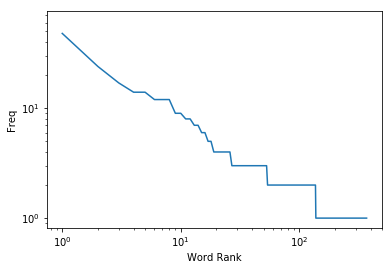

In [19]:
import matplotlib.pyplot as plt

word_counts = sorted(Counter(words).values(), reverse=True) # wir sortieren, so dass die Beziehung zu den Häufigkeiten besser hervorstechen

plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")
plt.show()

$10^0$ steht bei unserem Beispiel natürlich für unseren Hashtag *TookMeTheWholeYearTo*. Die Reihenfolge der nächsten Wörter kann man aus unserer *words* Tabelle ablesen. Dieser Plot war nur ein kleines Beispiel, was man machen könnte.

Als nächstes wollen wir noch ein Histogramm erstellen. Histogramme werden in der Statistik gerne verwendet um Dinge zu veranschaulichen. Wir werden unsere Retweethäufigkeiten in Form eines Histogramms darstellen. Dazu gruppieren wir Datenwerte zu *bins* zusammen, die einem Bereich von Häufigkeiten entsprechen. In unserem Datensatz gibt es eine kleine ausgewählte Anzahl von Retweets, die mehr Retweets haben als jene, die beispielsweise nur einmal geteilt wurden. Folgendes Histogramm kommt dabei zu Stande:

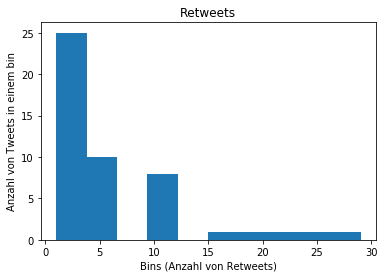

In [28]:
counts = [count for count, _, _ in retweets]

plt.hist(counts)
plt.title("Retweets")
plt.xlabel("Bins (Anzahl von Retweets)")
plt.ylabel("Anzahl von Tweets in einem bin")
plt.show()


Dieses Ergebnis war vorhersehbar, da es in unserem Datensatz nur sehr wenige Tweets gibt, die eine hohe Anzahl von Retweets vorweisen können - mit der höchsten Anzahl von 29 Retweets (Zum Vergleich: einer der Tweets mit den meisten Retweets stammt von Barack Obama mit über 1 Millionen Retweets). Im Gegensatz gibt es einige Tweets in unserem Datensatz, die nur einen Retweet erhalten haben, was wir an dem ersten großen Balken in unserem Histogramm sehen können.


# Fazit

Twitter ist ein vielfältiges soziales Netzwerk, mit dem man sehr viele umfangreiche Analysen betreiben kann. Dieses Notebook war nur ein kleiner Einschnitt in das Thema Datamining im Bezug auf Twitter.


# Quellen

O'Reilly - Mining the Social Web